In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
df = pd.read_html('https://fbref.com/tiny/6eemg',
                  attrs ={"id":"standard_stats"})[0]

In [3]:
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Bazƒ± s√ºtun adlarƒ± √∂rneƒüin ≈üu hale gelecek:
# 'Unnamed: 0_level_0_Player' ‚Üí 'Player'
# 'Playing Time_MP' ‚Üí 'MP'

# ƒ∞steƒüe g√∂re bazƒ±larƒ±nƒ± yeniden adlandƒ±rabilirsin:
df.rename(columns={
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Span': 'Year',
    'Unnamed: 2_level_0_Nation': 'Nation',
    'Unnamed: 3_level_0_Pos': 'Position',
    'Playing Time_MP': 'MP',
    'Performance_Gls': 'Goals',
    'Playing Time_Min': 'Minutes',
    'Unnamed: 4_level_0_Squad': 'Squad'
}, inplace=True)

In [4]:
df.head()

Player     Year  Nation Position            Squad  MP  \
0   Mohamed Salah  2024-25  eg EGY       FW        Liverpool  38   
1  Alexander Isak  2024-25  se SWE       FW    Newcastle Utd  34   
2  Erling Haaland  2024-25  no NOR       FW  Manchester City  31   
3      Chris Wood  2024-25  nz NZL       FW  Nott'ham Forest  36   
4    Bryan Mbeumo  2024-25  cm CMR       FW        Brentford  38   

   Playing Time_Starts  Minutes  Playing Time_90s  Goals  ...  \
0                   38     3371              37.5     29  ...   
1                   34     2756              30.6     23  ...   
2                   31     2736              30.4     22  ...   
3                   35     2959              32.9     20  ...   
4                   38     3414              37.9     20  ...   

   Per 90 Minutes_Gls  Per 90 Minutes_Ast  Per 90 Minutes_G+A  \
0                0.77                0.48                1.25   
1                0.75                0.20                0.95   
2                0.72                0.10                0.82   
3                0.61                0.09                0.70   
4                0.53                0.18                0.71   

   Per 90 Minutes_G-PK  Per 90 Minutes_G+A-PK  Per 90 Minutes_xG  \
0                 0.53                   1.01               0.67   
1                 0.62                   0.82               0.66   
2                 0.62                   0.72               0.72   
3                 0.52                   0.61               0.41   
4                 0.40                   0.58               0.32   

   Per 90 Minutes_xAG  Per 90 Minutes_xG+xAG  Per 90 Minutes_npxG  \
0                0.38                   1.05                 0.49   
1                0.14                   0.81                 0.56   
2                0.10                   0.82                 0.62   
3                0.08                   0.49                 0.34   
4                0.22                   0.54                 0.20   

   Per 90 Minutes_npxG+xAG  
0                     0.87  
1                     0.70  
2                     0.72  
3                     0.42  
4                     0.42  

[5 rows x 34 columns]

In [13]:
# Diyelim veri DataFrame'inde df adlƒ± deƒüi≈ükende var
df.to_csv("premier_league_2024_25.csv", index=False)


In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Goals', y='Player', palette='rocket')
plt.title('2024-25 Sezonu - Oyuncu Gol Sayƒ±sƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.xlabel('Gol Sayƒ±sƒ±')
plt.ylabel('Oyuncu')
plt.tight_layout()
plt.show()

C:\Users\erens\AppData\Local\Temp\ipykernel_8980\1631699594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Goals', y='Player', palette='rocket')


C:\Users\erens\AppData\Local\Temp\ipykernel_8980\1404556858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Per 90 Minutes_Gls', y='Player', palette='viridis')


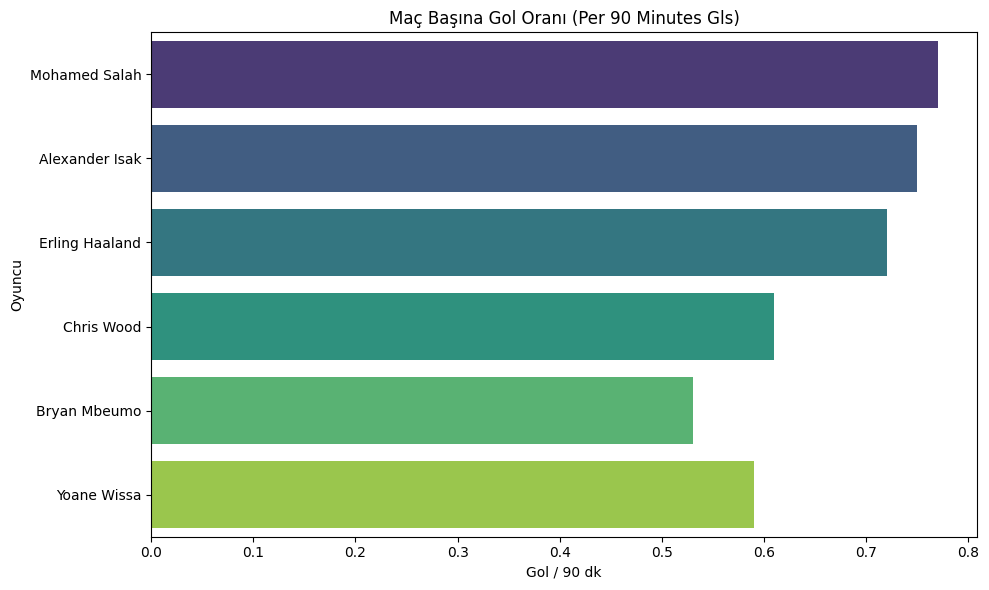

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Per 90 Minutes_Gls', y='Player', palette='viridis')
plt.title('Ma√ß Ba≈üƒ±na Gol Oranƒ± (Per 90 Minutes Gls)')
plt.xlabel('Gol / 90 dk')
plt.ylabel('Oyuncu')
plt.tight_layout()
plt.show()


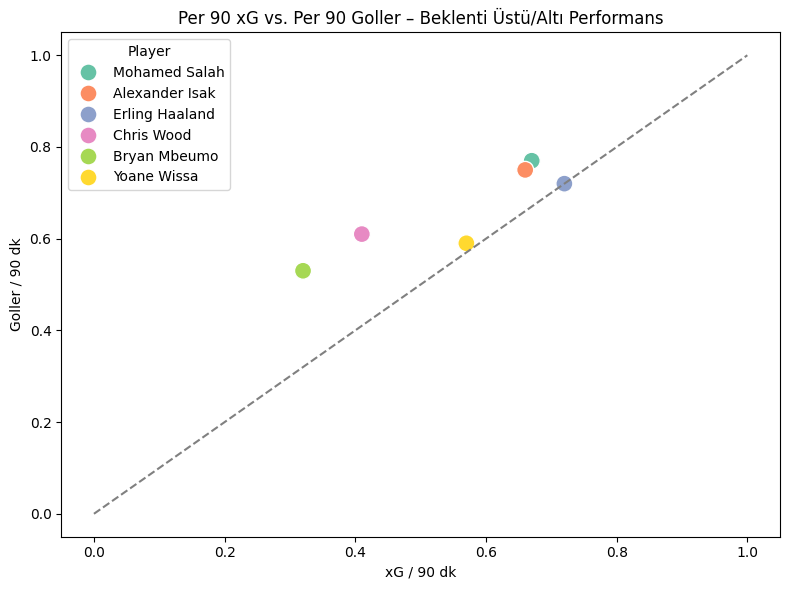

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Per 90 Minutes_xG',
    y='Per 90 Minutes_Gls',
    hue='Player',
    s=150,
    palette='Set2'
)
plt.plot([0, 1], [0, 1], '--', color='gray')  # e≈üitlik √ßizgisi
plt.title('Per 90 xG vs. Per 90 Goller ‚Äì Beklenti √úst√º/Altƒ± Performans')
plt.xlabel('xG / 90 dk')
plt.ylabel('Goller / 90 dk')
plt.tight_layout()
plt.show()


C:\Users\erens\AppData\Local\Temp\ipykernel_8980\2155034519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Per 90 Minutes_G+A', y='Player', palette='magma')


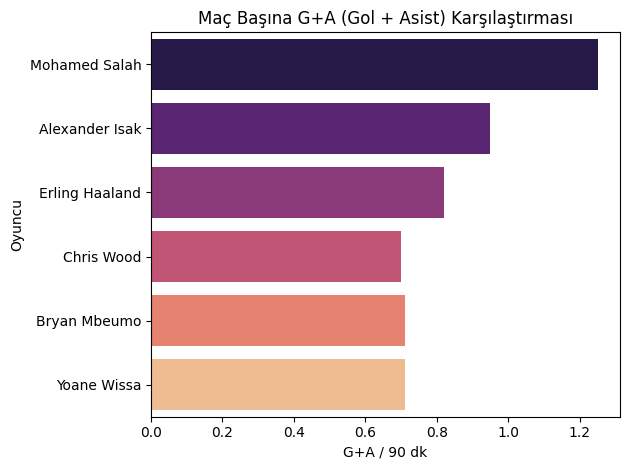

In [8]:
sns.barplot(data=df, x='Per 90 Minutes_G+A', y='Player', palette='magma')
plt.title('Ma√ß Ba≈üƒ±na G+A (Gol + Asist) Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.xlabel('G+A / 90 dk')
plt.ylabel('Oyuncu')
plt.tight_layout()
plt.show()


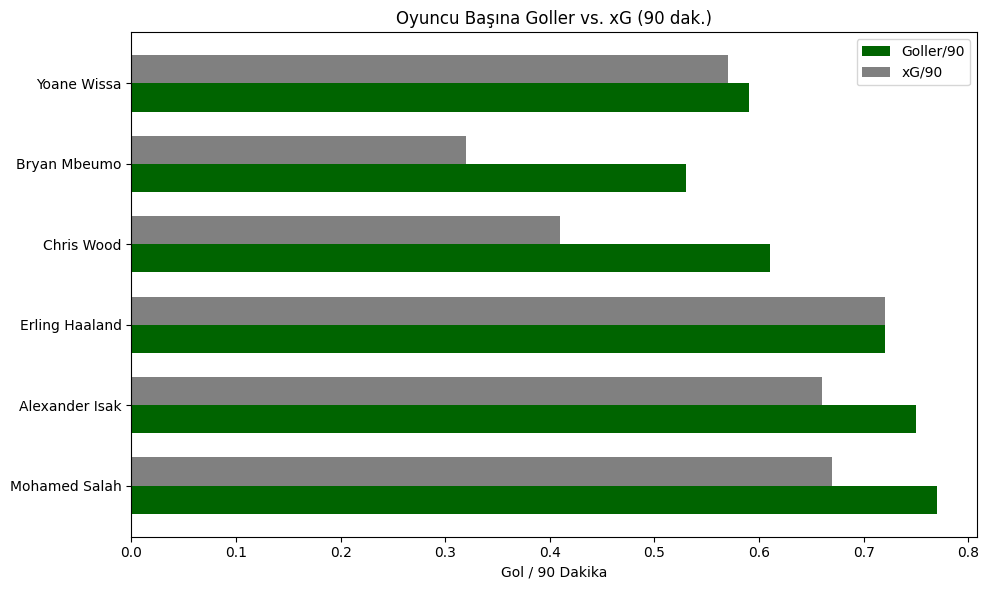

In [9]:
import matplotlib.pyplot as plt

players = df['Player']
goals = df['Per 90 Minutes_Gls']
xg = df['Per 90 Minutes_xG']

plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = range(len(players))

plt.barh(indices, goals, bar_width, label='Goller/90', color='darkgreen')
plt.barh([i + bar_width for i in indices], xg, bar_width, label='xG/90', color='gray')

plt.yticks([i + bar_width / 2 for i in indices], players)
plt.xlabel('Gol / 90 Dakika')
plt.title('Oyuncu Ba≈üƒ±na Goller vs. xG (90 dak.)')
plt.legend()
plt.tight_layout()
plt.show()


Bu grafik, oyuncularƒ±n ne kadar bitirici olduƒüunu g√∂sterir.

Eƒüer oyuncunun gol barƒ±, xG barƒ±ndan y√ºksekse, oyuncu beklentinin √ºzerinde gol atƒ±yor.

Tam tersi durumda, pozisyonlarƒ± gole √ßevirmekte zorlanƒ±yor olabilir.

In [10]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# Radar chart i√ßin normalize edilmi≈ü veri hazƒ±rlƒ±ƒüƒ±
metrics = [
    'Per 90 Minutes_Gls', 
    'Per 90 Minutes_Ast', 
    'Per 90 Minutes_G+A',
    'Per 90 Minutes_xG', 
    'Per 90 Minutes_xAG'
]

df_radar = df.set_index('Player')[metrics]
df_radar = df_radar.div(df_radar.max())  # normalize et

# Radar √ßizimi
labels = metrics
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # loop back to start

plt.figure(figsize=(8, 8))

for player in df_radar.index:
    values = df_radar.loc[player].tolist()
    values += values[:1]
    plt.polar(angles, values, label=player, linewidth=2)

plt.xticks(angles[:-1], labels, color='gray')
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], color="lightgray")
plt.title('Oyuncu Performans Radarƒ± (Normalize)', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Bu grafik oyuncularƒ±n hangi alanlarda √∂ne √ßƒ±ktƒ±ƒüƒ±nƒ± g√∂sterir.

√ñrneƒüin: Gol + Asist y√ºksek ama xG/xAG d√º≈ü√ºkse oyuncu bitiricilikle √∂ne √ßƒ±kƒ±yor.

Radar geni≈üliƒüi = oyuncunun ofansif profili.

In [11]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for idx, row in df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Per 90 Minutes_xG'], row['Per 90 Minutes_Gls']],
        y=[row['Player'], row['Player']],
        mode='lines+markers',
        marker=dict(size=10),
        line=dict(width=3),
        name=row['Player']
    ))

fig.update_layout(
    title="Goller vs. xG (Per 90 Dakika)",
    xaxis_title="Deƒüer",
    yaxis_title="Oyuncu",
    showlegend=False
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Oyuncunun √ßizgisi ne kadar saƒüa uzuyorsa, o kadar fazla xG‚Äônin √ºst√ºnde gol atmƒ±≈ütƒ±r.

Sol tarafta kalƒ±yorsa, pozisyonlarƒ± deƒüerlendirmekte sorun ya≈üƒ±yor olabilir.

Bu grafik ‚Äúgol beklentisiyle ger√ßek √ºretkenlik‚Äù arasƒ±ndaki farkƒ± √ßok net g√∂sterir.

C:\Users\erens\AppData\Local\Temp\ipykernel_17868\829625088.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




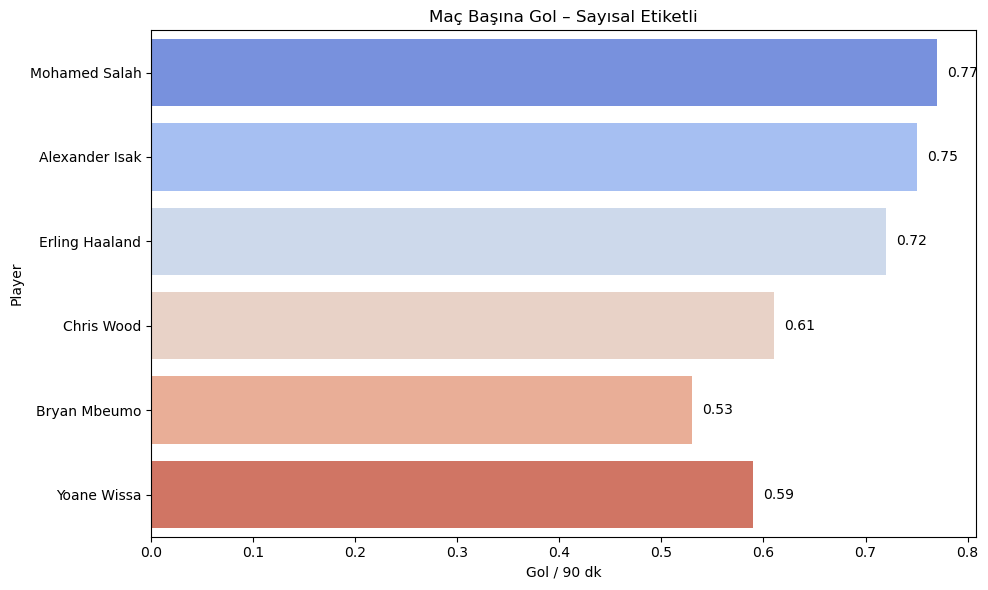

In [29]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Per 90 Minutes_Gls', y='Player', palette='coolwarm')

for i, val in enumerate(df['Per 90 Minutes_Gls']):
    ax.text(val + 0.01, i, f"{val:.2f}", va='center')

plt.title('Ma√ß Ba≈üƒ±na Gol ‚Äì Sayƒ±sal Etiketli')
plt.xlabel('Gol / 90 dk')
plt.tight_layout()
plt.show()


Klasik barplot‚Äôun √ºst√ºne deƒüer yazƒ±larak analiz okunabilirliƒüi artƒ±rƒ±ldƒ±.

Profesyonel raporlarda ve sunumlarda √ßok kullanƒ±≈ülƒ±dƒ±r.

G√∂lgelendirme ile oyuncular arasƒ± fark daha belirgin hale gelir.

2025-08-01 16:38:33.685 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.771 
  command:

    streamlit run C:\Users\erens\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-01 16:38:33.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.777 Thre

DeltaGenerator()

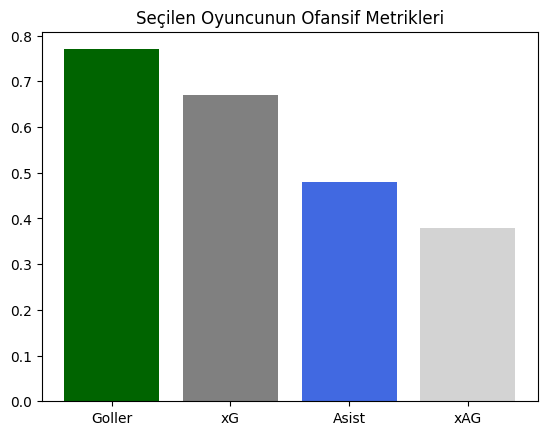

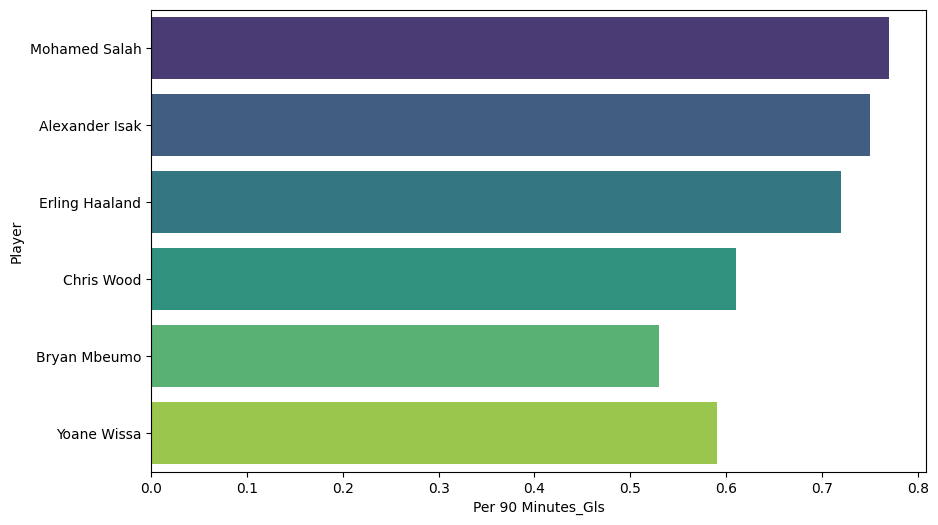

In [12]:
st.title("Premier League Gol Krallƒ±ƒüƒ± Analizi ‚Äì 2024/25")

# Oyuncu se√ßimi
player = st.selectbox("Bir oyuncu se√ß:", df['Player'])

# Se√ßilen oyuncunun verisi
selected = df[df['Player'] == player].squeeze()

st.subheader(f"{player} ‚Äì Performans √ñzeti")

st.markdown(f"""
- üéØ Goller / 90 dk: `{selected['Per 90 Minutes_Gls']:.2f}`
- üìà xG / 90 dk: `{selected['Per 90 Minutes_xG']:.2f}`
- üÖ∞Ô∏è Asistler / 90 dk: `{selected['Per 90 Minutes_Ast']:.2f}`
- ‚öôÔ∏è xAG / 90 dk: `{selected['Per 90 Minutes_xAG']:.2f}`
""")

# Bar Chart
fig, ax = plt.subplots()
metrics = {
    "Goller": selected['Per 90 Minutes_Gls'],
    "xG": selected['Per 90 Minutes_xG'],
    "Asist": selected['Per 90 Minutes_Ast'],
    "xAG": selected['Per 90 Minutes_xAG']
}
ax.bar(metrics.keys(), metrics.values(), color=['darkgreen', 'gray', 'royalblue', 'lightgray'])
ax.set_title("Se√ßilen Oyuncunun Ofansif Metrikleri")
st.pyplot(fig)

# T√ºm oyuncular i√ßin kar≈üƒ±la≈ütƒ±rma (isteƒüe baƒülƒ±)
st.subheader("T√ºm Oyuncular ‚Äì Gol / 90 dk")
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x="Per 90 Minutes_Gls", y="Player", ax=ax2, palette="viridis")
st.pyplot(fig2)